# Prediction of income class

In this exercise, we have the task of predcting income classes based on a series of input characteristics. We will follow the following standard steps:

1. loading the training data, 
2. conduct exploratory data analysis, 
3. conduct some preprocessing and cleaning, 
4. fit classification models to training data, 
5. make predictions on the test data, 
6. the performance of the models using metrics. 

We will start by first loading the important modules. Pandas and scikit-learn are the important modules we will be using here. 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np

Loading the data is the first step

In [38]:
raw_data_train = pd.read_csv('au_train.csv')
raw_data_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Our input data consists of both categorical and numeric features. The last column is the dependent variable. We have to do a few things now - separate the raw data into independent features and dependent feature (label), identify if any features are double counted or are irrelevant, then encode the categorical features and the output label. 

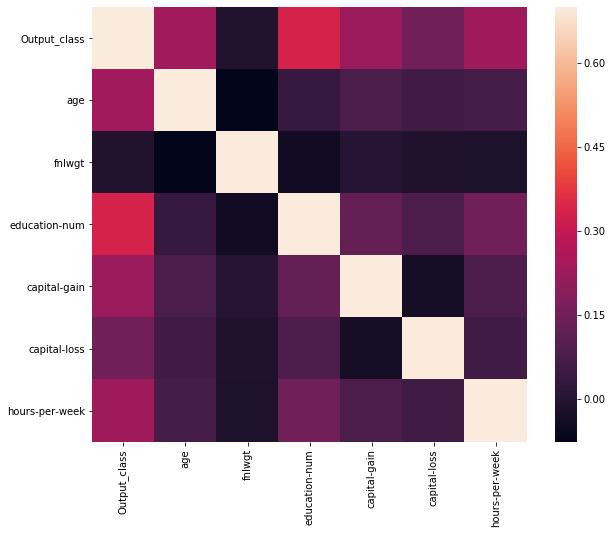

In [39]:
X_train = raw_data_train.iloc[:,:14]
y_train = raw_data_train.iloc[:,-1]

le = LabelEncoder()
y_train = le.fit_transform(y_train)
# Exploratory data analysis 

df = pd.DataFrame(y_train, columns=['Output_class'])
test = pd.concat([df,raw_data_train], axis=1)

corrmat =  test.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.7, square=True)
plt.show()

We see that the feature fnlwgt is not correlated at all with the output class, so we can safely drop that feature. Also, we see that there are two features describing eduction level - "education" and "education_num". So, we can drop the categorical feature "education". 

In [40]:
raw_data_train = raw_data_train.drop(['fnlwgt', 'education'], axis=1)
X_train = raw_data_train.iloc[:,:12]
y_train = raw_data_train.iloc[:,-1]
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = pd.DataFrame(y_train,columns=['Output_class'])
print (raw_data_train.head())

cat = len(X_train.select_dtypes(include=['object']).columns)
num = len(X_train.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

   age          workclass  education-num       marital-status  \
0   39          State-gov             13        Never-married   
1   50   Self-emp-not-inc             13   Married-civ-spouse   
2   38            Private              9             Divorced   
3   53            Private              7   Married-civ-spouse   
4   28            Private             13   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital-loss  hours-per-week  native-country   class  
0             0              40   United-States   <=50K  
1             0              13   United-States   <=50K  
2 

We note that we have both categorical features and numerical features. The categorical features are encoded using OneHotEncoder, which is the standard encoder used for 

In [41]:

# Loading and preprocessing testing data
raw_data_test = pd.read_csv('au_test.csv')
raw_data_test.head()
raw_data_test = raw_data_test.drop(['fnlwgt', 'education'], axis=1)

X_test = raw_data_test.iloc[:,:12]
y_test = raw_data_test.iloc[:,-1]
le = LabelEncoder()
y_test = le.fit_transform(y_test)
y_test = pd.DataFrame(y_test,columns=['Output_class'])


We would ideally like to use OneHotEncoder to encode the categorical features (since none of them have any cardinality). But, in one of the features, there are more distinct values in the training data than in the test data. So, if we apply OneHotEncoder to the two datasets separately, there is one more column in the training data than in the test data. One way to overcome this is to combine the two datasets, apply the encoder on the combined dataset, and then separate the training and test datasets, as below:

In [42]:
X_train['train'] = 1
X_test['train'] = 0

combined = pd.concat([X_train, X_test], axis=0)

combined = pd.get_dummies(combined, prefix_sep='_')
combined.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,train,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We're almost ready to train models with the dataset. One last step is to normalize/scale the features such that they are of comparable magnitudes. We will use StandardScaler for this purpose. 

In [29]:
X_train = combined[combined['train'] == 1]
X_test = combined[combined['train'] == 0]
X_train.drop(['train'], axis=1, inplace=True)
X_test.drop(['train'], axis=1, inplace=True)

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [30]:
# Training the data and predicting 
# Logistic regression
from sklearn.linear_model import LogisticRegression
# fit a model
lrclf = LogisticRegression(solver='lbfgs')
lrclf.fit(X_train_scaled, y_train)
y_pred_lr = lrclf.predict(X_test_scaled)
# predict probabilities
lr_probs = model.predict_proba(X_test_scaled)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(max_depth=10, random_state=0)
rfclf.fit(X_train_scaled, y_train)
y_pred_rf = rfclf.predict(X_test_scaled)

rf_probs = rfclf.predict_proba(X_test_scaled)
rf_probs = rf_probs[:, 1]


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [32]:
# SVM classifier
from sklearn import svm
svmclf = svm.SVC(kernel='rbf', probability=True)
svmclf.fit(X_train_scaled, y_train)
y_pred_svm = svmclf.predict(X_test_scaled)

svm_probs = svmclf.predict_proba(X_test_scaled)
svm_probs = svm_probs[:, 1]

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
# Multi-layer perceptron 
from sklearn.neural_network import MLPClassifier
mlpclf = MLPClassifier(max_iter=100,activation = 'relu',solver='adam',random_state=1)
mlpclf.fit(X_train_scaled, y_train)
y_pred_mlp = mlpclf.predict(X_test_scaled)

mlp_probs = mlpclf.predict_proba(X_test_scaled)
mlp_probs = mlp_probs[:, 1]

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Logistic: Confusion Matrix
[[11555   880]
 [ 1517  2329]]
Random Forest: Confusion Matrix
[[11903   532]
 [ 1801  2045]]
Support Vector Machine: Confusion Matrix
[[11637   798]
 [ 1616  2230]]
Multi layer perceptron: Confusion Matrix
[[11299  1136]
 [ 1361  2485]]
Logistic: Accuracy=0.853
Random Forest: Accuracy=0.857
Support Vector Machine: Accuracy=0.852
Multi layer perceptron: Accuracy=0.847
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.904
Random Forest: ROC AUC=0.905
Support Vector Machine: ROC AUC=0.895
Multi layer perceptron: ROC AUC=0.896


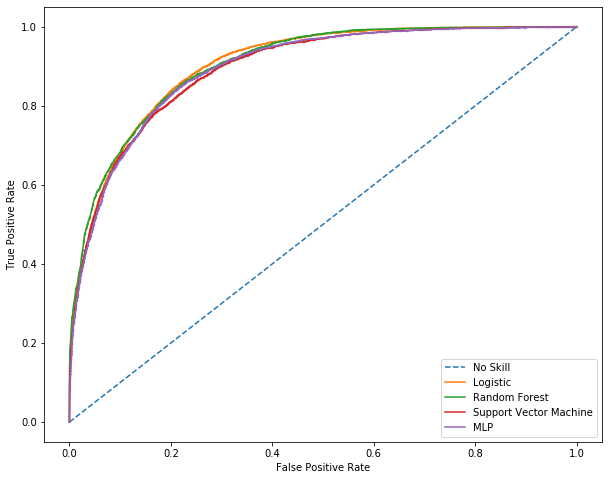

In [36]:
# roc curve and auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from matplotlib.pyplot import figure

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)


print('Logistic: Confusion Matrix' )
print (confusion_matrix(y_test, y_pred_lr))
print('Random Forest: Confusion Matrix' )
print (confusion_matrix(y_test, y_pred_rf))
print('Support Vector Machine: Confusion Matrix' )
print (confusion_matrix(y_test, y_pred_svm))
print('Multi layer perceptron: Confusion Matrix' )
print (confusion_matrix(y_test, y_pred_mlp))

print('Logistic: Accuracy=%.3f' % (accuracy_score(y_test, y_pred_lr)))
print('Random Forest: Accuracy=%.3f' % (accuracy_score(y_test, y_pred_rf)))
print('Support Vector Machine: Accuracy=%.3f' % (accuracy_score(y_test, y_pred_svm)))
print('Multi layer perceptron: Accuracy=%.3f' % (accuracy_score(y_test, y_pred_mlp)))




# summarize ROC AUC scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
print('Support Vector Machine: ROC AUC=%.3f' % (svm_auc))
print('Multi layer perceptron: ROC AUC=%.3f' % (mlp_auc))


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)

# plot the roc curve for the model
figure(figsize=(10,8))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', markersize=0.2,label='Logistic')
pyplot.plot(rf_fpr, rf_tpr, marker='.', markersize=0.2, label='Random Forest')
pyplot.plot(svm_fpr, svm_tpr, marker='.', markersize=0.2, label='Support Vector Machine')
pyplot.plot(mlp_fpr, mlp_tpr, marker='.', markersize=0.2, label='MLP')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Conclusion

In summary, we have used four different machine learning algorithms to make predictions about the income class. All four classification models give reasonable accuracies, with Random Forest algorithm providing the best accuracy. We also used area under the ROC curve as a metric and we saw that Random Forest performs best again. We can definitely perform much better on these models with some parameter tuning. 